In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.891350,-0.628997,1.204061,0.813420
2013-01-02,0.523726,-0.771499,-1.359150,-1.607977
2013-01-03,-0.249084,-0.155914,1.091985,-0.596032
2013-01-04,2.185370,0.555034,1.693895,0.203328
2013-01-05,1.277225,0.846869,0.839063,0.166174
2013-01-06,-0.330808,0.312879,0.226229,-1.530283


In [5]:
df2 = pd.DataFrame({
    'A': 1,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,1,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.891350,-0.628997,1.204061,0.813420
2013-01-02,0.523726,-0.771499,-1.359150,-1.607977
2013-01-03,-0.249084,-0.155914,1.091985,-0.596032
2013-01-04,2.185370,0.555034,1.693895,0.203328
2013-01-05,1.277225,0.846869,0.839063,0.166174


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,2.185370,0.555034,1.693895,0.203328
2013-01-05,1.277225,0.846869,0.839063,0.166174
2013-01-06,-0.330808,0.312879,0.226229,-1.530283


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.89135011, -0.62899738,  1.20406096,  0.81341972],
       [ 0.5237258 , -0.77149923, -1.35914962, -1.60797679],
       [-0.24908358, -0.15591356,  1.09198516, -0.59603199],
       [ 2.18537035,  0.555034  ,  1.6938951 ,  0.2033276 ],
       [ 1.27722531,  0.84686877,  0.83906299,  0.16617416],
       [-0.33080833,  0.31287861,  0.22622945, -1.53028302]])

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.419180,0.026395,0.616014,-0.425228
std,1.148316,0.653318,1.080475,0.992804
min,-0.891350,-0.771499,-1.359150,-1.607977
25%,-0.310377,-0.510726,0.379438,-1.296720
50%,0.137321,0.078483,0.965524,-0.214929
75%,1.088850,0.494495,1.176042,0.194039
max,2.185370,0.846869,1.693895,0.813420


In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.891350,0.523726,-0.249084,2.185370,1.277225,-0.330808
B,-0.628997,-0.771499,-0.155914,0.555034,0.846869,0.312879
C,1.204061,-1.359150,1.091985,1.693895,0.839063,0.226229
D,0.813420,-1.607977,-0.596032,0.203328,0.166174,-1.530283


In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.813420,1.204061,-0.628997,-0.891350
2013-01-02,-1.607977,-1.359150,-0.771499,0.523726
2013-01-03,-0.596032,1.091985,-0.155914,-0.249084
2013-01-04,0.203328,1.693895,0.555034,2.185370
2013-01-05,0.166174,0.839063,0.846869,1.277225
2013-01-06,-1.530283,0.226229,0.312879,-0.330808


In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,0.523726,-0.771499,-1.359150,-1.607977
2013-01-01,-0.891350,-0.628997,1.204061,0.813420
2013-01-03,-0.249084,-0.155914,1.091985,-0.596032
2013-01-06,-0.330808,0.312879,0.226229,-1.530283
2013-01-04,2.185370,0.555034,1.693895,0.203328
2013-01-05,1.277225,0.846869,0.839063,0.166174


## Selection

### Getting

In [16]:
df['A']

2013-01-01   -0.891350
2013-01-02    0.523726
2013-01-03   -0.249084
2013-01-04    2.185370
2013-01-05    1.277225
2013-01-06   -0.330808
Freq: D, Name: A, dtype: float64

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,-0.891350,-0.628997,1.204061,0.813420
2013-01-02,0.523726,-0.771499,-1.359150,-1.607977
2013-01-03,-0.249084,-0.155914,1.091985,-0.596032


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.523726,-0.771499,-1.359150,-1.607977
2013-01-03,-0.249084,-0.155914,1.091985,-0.596032
2013-01-04,2.185370,0.555034,1.693895,0.203328


### Selection by Label

In [19]:
df.loc[dates[0]]

A   -0.891350
B   -0.628997
C    1.204061
D    0.813420
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
df.loc[ : , ['A', 'B']]

,A,B
2013-01-01,-0.891350,-0.628997
2013-01-02,0.523726,-0.771499
2013-01-03,-0.249084,-0.155914
2013-01-04,2.185370,0.555034
2013-01-05,1.277225,0.846869
2013-01-06,-0.330808,0.312879


In [21]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.523726,-0.771499
2013-01-03,-0.249084,-0.155914
2013-01-04,2.185370,0.555034


In [22]:
df.loc['20130102', ['A', 'B']]

A    0.523726
B   -0.771499
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
df.loc[dates[0], 'A']

-0.8913501083865247

In [24]:
df.at[dates[0],'A']

-0.8913501083865247

### Selection by Position

In [25]:
df.iloc[3]

A    2.185370
B    0.555034
C    1.693895
D    0.203328
Name: 2013-01-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,2.185370,0.555034
2013-01-05,1.277225,0.846869


In [27]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.523726,-1.359150
2013-01-03,-0.249084,1.091985
2013-01-05,1.277225,0.839063


In [28]:
df.iloc[1:3,  : ]

,A,B,C,D
2013-01-02,0.523726,-0.771499,-1.359150,-1.607977
2013-01-03,-0.249084,-0.155914,1.091985,-0.596032


In [29]:
df.iloc[ : , 1:3]

,B,C
2013-01-01,-0.628997,1.204061
2013-01-02,-0.771499,-1.359150
2013-01-03,-0.155914,1.091985
2013-01-04,0.555034,1.693895
2013-01-05,0.846869,0.839063
2013-01-06,0.312879,0.226229


In [30]:
df.iloc[1, 1]

-0.771499226184458

In [31]:
df.iat[1, 1]

-0.771499226184458

### Boolean Indexing

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.523726,-0.771499,-1.359150,-1.607977
2013-01-04,2.185370,0.555034,1.693895,0.203328
2013-01-05,1.277225,0.846869,0.839063,0.166174


In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.204061,0.813420
2013-01-02,0.523726,NaN,NaN,NaN
2013-01-03,NaN,NaN,1.091985,NaN
2013-01-04,2.185370,0.555034,1.693895,0.203328
2013-01-05,1.277225,0.846869,0.839063,0.166174
2013-01-06,NaN,0.312879,0.226229,NaN


In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.891350,-0.628997,1.204061,0.813420,one
2013-01-02,0.523726,-0.771499,-1.359150,-1.607977,one
2013-01-03,-0.249084,-0.155914,1.091985,-0.596032,two
2013-01-04,2.185370,0.555034,1.693895,0.203328,three
2013-01-05,1.277225,0.846869,0.839063,0.166174,four
2013-01-06,-0.330808,0.312879,0.226229,-1.530283,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.249084,-0.155914,1.091985,-0.596032,two
2013-01-05,1.277225,0.846869,0.839063,0.166174,four


### Setting

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1
df.at[dates[0], 'A'] = 0
df.iat[0, 1] = 0
df.loc[ : , 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.204061,5,NaN
2013-01-02,0.523726,-0.771499,-1.359150,5,1.0
2013-01-03,-0.249084,-0.155914,1.091985,5,2.0
2013-01-04,2.185370,0.555034,1.693895,5,3.0
2013-01-05,1.277225,0.846869,0.839063,5,4.0
2013-01-06,-0.330808,0.312879,0.226229,5,5.0


In [38]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.204061,-5,NaN
2013-01-02,-0.523726,-0.771499,-1.359150,-5,-1.0
2013-01-03,-0.249084,-0.155914,-1.091985,-5,-2.0
2013-01-04,-2.185370,-0.555034,-1.693895,-5,-3.0
2013-01-05,-1.277225,-0.846869,-0.839063,-5,-4.0
2013-01-06,-0.330808,-0.312879,-0.226229,-5,-5.0


## Missing Data

In [39]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.204061,5,NaN,1.0
2013-01-02,0.523726,-0.771499,-1.359150,5,1.0,1.0
2013-01-03,-0.249084,-0.155914,1.091985,5,2.0,NaN
2013-01-04,2.185370,0.555034,1.693895,5,3.0,NaN


In [40]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.523726,-0.771499,-1.35915,5,1.0,1.0


In [41]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.204061,5,5.0,1.0
2013-01-02,0.523726,-0.771499,-1.359150,5,1.0,1.0
2013-01-03,-0.249084,-0.155914,1.091985,5,2.0,5.0
2013-01-04,2.185370,0.555034,1.693895,5,3.0,5.0


In [42]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

In [43]:
df.mean()

A    0.567738
B    0.131228
C    0.616014
D    5.000000
F    3.000000
dtype: float64

In [44]:
df.mean(1)

2013-01-01    1.551015
2013-01-02    0.878615
2013-01-03    1.537398
2013-01-04    2.486860
2013-01-05    2.392631
2013-01-06    2.041660
Freq: D, dtype: float64

In [45]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [46]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.249084,-1.155914,0.091985,4.0,1.0
2013-01-04,-0.814630,-2.444966,-1.306105,2.0,0.0
2013-01-05,-3.722775,-4.153131,-4.160937,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [47]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.204061,5,NaN
2013-01-02,0.523726,-0.771499,-0.155089,10,1.0
2013-01-03,0.274642,-0.927413,0.936897,15,3.0
2013-01-04,2.460013,-0.372379,2.630792,20,6.0
2013-01-05,3.737238,0.474490,3.469855,25,10.0
2013-01-06,3.406430,0.787369,3.696084,30,15.0


In [48]:
df.apply(lambda x: x.max() - x.min())

A    2.516179
B    1.618368
C    3.053045
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [49]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    6
2    1
3    1
4    4
5    1
6    1
7    1
8    0
9    1
dtype: int64

In [50]:
s.value_counts()

1    6
6    1
4    1
2    1
0    1
dtype: int64

### String Methods

In [51]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [52]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.027794,-0.674232,-0.640173,-0.016795
1,0.276568,-0.973669,0.450451,-0.257133
2,0.596052,-0.921343,0.557466,0.356550
3,1.019784,-0.498810,-0.441500,0.687155
4,-2.509975,-1.685677,1.496842,0.256805
5,0.343703,0.203990,0.151899,0.862044
6,-1.554087,1.145354,-0.779816,-1.481650
7,0.451856,0.926873,-0.488142,-0.832392
8,-1.075494,-1.201422,-0.923947,-1.143740
9,-1.011777,-0.025433,-0.801089,-1.118237


In [53]:
pieces = [df[ :3], df[3:7], df[7: ]]
pd.concat(pieces)

,0,1,2,3
0,0.027794,-0.674232,-0.640173,-0.016795
1,0.276568,-0.973669,0.450451,-0.257133
2,0.596052,-0.921343,0.557466,0.356550
3,1.019784,-0.498810,-0.441500,0.687155
4,-2.509975,-1.685677,1.496842,0.256805
5,0.343703,0.203990,0.151899,0.862044
6,-1.554087,1.145354,-0.779816,-1.481650
7,0.451856,0.926873,-0.488142,-0.832392
8,-1.075494,-1.201422,-0.923947,-1.143740
9,-1.011777,-0.025433,-0.801089,-1.118237


### Join

In [54]:
left = pd.DataFrame({
    'key': ['foo', 'foo'],
    'lval': [1, 2]
})
right = pd.DataFrame({
    'key': ['foo', 'foo'],
    'rval': [4, 5]
})
left

,key,lval
0,foo,1
1,foo,2


In [55]:
right

,key,rval
0,foo,4
1,foo,5


In [56]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [57]:
left = pd.DataFrame({
    'key': ['foo', 'bar'], 
    'lval': [1, 2]
})
right = pd.DataFrame({
    'key': ['foo', 'bar'],
    'rval': [4, 5]
})
left

,key,lval
0,foo,1
1,bar,2


In [58]:
right

,key,rval
0,foo,4
1,bar,5


In [59]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [60]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.108033,1.314894,0.902631,-0.256782
1,-0.699719,-0.903715,-1.189055,-0.191914
2,0.232076,0.314491,0.321471,-0.684069
3,0.563677,-0.090549,0.663025,-0.389779
4,0.397785,2.029899,0.887486,0.513832
5,-0.353610,-0.489973,0.899709,0.941201
6,-0.468000,-1.440751,1.093884,-1.185180
7,0.230638,-1.061982,-1.068240,0.259297


## Grouping

In [61]:
df = pd.DataFrame({
    'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,-0.834209,-0.781502
1,bar,one,-1.206378,-1.750050
2,foo,two,0.498843,-1.639286
3,bar,three,0.154768,-1.750633
4,foo,two,0.109549,-1.607042
5,bar,two,-0.237770,0.446177
6,foo,one,0.851526,1.237764
7,foo,three,0.094214,-1.388785


In [62]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.289380,-3.054506
foo,0.719923,-4.178850


In [63]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.206378 -1.750050
    three  0.154768 -1.750633
    two   -0.237770  0.446177
foo one    0.017316  0.456263
    three  0.094214 -1.388785
    two    0.608392 -3.246327

## Reshaping

### Stack

In [64]:
tuples = list(zip(*[
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], 
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[ :4]
df2

A         B
first second                    
bar   one    -0.629611  0.026374
      two    -0.377675  0.112307
baz   one     0.696036  1.123754
      two    -0.452166 -0.642447

In [65]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.629611
               B    0.026374
       two     A   -0.377675
               B    0.112307
baz    one     A    0.696036
               B    1.123754
       two     A   -0.452166
               B   -0.642447
dtype: float64

In [66]:
stacked.unstack()

A         B
first second                    
bar   one    -0.629611  0.026374
      two    -0.377675  0.112307
baz   one     0.696036  1.123754
      two    -0.452166 -0.642447

In [67]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.629611 -0.377675
      B  0.026374  0.112307
baz   A  0.696036 -0.452166
      B  1.123754 -0.642447

In [68]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.629611  0.696036
       B  0.026374  1.123754
two    A -0.377675 -0.452166
       B  0.112307 -0.642447

### Pivot Tables

In [69]:
df = pd.DataFrame({
    'A' : ['one', 'one', 'two', 'three'] * 3,
    'B' : ['A', 'B', 'C'] * 4,
    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D' : np.random.randn(12),
    'E' : np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,0.584590,0.612802
1,one,B,foo,1.032910,0.467249
2,two,C,foo,0.923374,-0.358392
3,three,A,bar,0.820492,-0.250624
4,one,B,bar,-1.224420,-0.813826
5,one,C,bar,-0.238188,-0.169198
6,two,A,foo,-0.473738,-0.391166
7,three,B,foo,-1.387328,0.189520
8,one,C,foo,0.147654,0.882741
9,one,A,bar,0.520938,0.316515


In [70]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.520938  0.584590
      B -1.224420  1.032910
      C -0.238188  0.147654
three A  0.820492       NaN
      B       NaN -1.387328
      C  0.400397       NaN
two   A       NaN -0.473738
      B -0.867865       NaN
      C       NaN  0.923374

## Time Series

In [71]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26173
Freq: 5T, dtype: int64

In [72]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.793652
2012-03-07   -2.424718
2012-03-08   -1.016318
2012-03-09   -1.565121
2012-03-10   -0.241893
Freq: D, dtype: float64

In [73]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.793652
2012-03-07 00:00:00+00:00   -2.424718
2012-03-08 00:00:00+00:00   -1.016318
2012-03-09 00:00:00+00:00   -1.565121
2012-03-10 00:00:00+00:00   -0.241893
Freq: D, dtype: float64

In [74]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.793652
2012-03-06 19:00:00-05:00   -2.424718
2012-03-07 19:00:00-05:00   -1.016318
2012-03-08 19:00:00-05:00   -1.565121
2012-03-09 19:00:00-05:00   -0.241893
Freq: D, dtype: float64

In [75]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.882812
2012-02-29    0.109059
2012-03-31    0.179989
2012-04-30   -0.183784
2012-05-31    1.872097
Freq: M, dtype: float64

In [76]:
ps = ts.to_period()
ps

2012-01    0.882812
2012-02    0.109059
2012-03    0.179989
2012-04   -0.183784
2012-05    1.872097
Freq: M, dtype: float64

In [77]:
ps.to_timestamp()

2012-01-01    0.882812
2012-02-01    0.109059
2012-03-01    0.179989
2012-04-01   -0.183784
2012-05-01    1.872097
Freq: MS, dtype: float64

In [78]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.584141
1990-06-01 09:00    0.007832
1990-09-01 09:00   -0.255777
1990-12-01 09:00    0.215048
1991-03-01 09:00    0.236496
Freq: H, dtype: float64

## Categoricals

In [79]:
df = pd.DataFrame({
    "id":[1,2,3,4,5,6], 
    "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']
})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [80]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [81]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [82]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

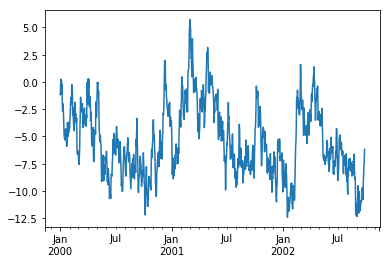

In [83]:
ts = pd.Series(
    np.random.randn(1000), 
    index=pd.date_range('1/1/2000', periods=1000)
)
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

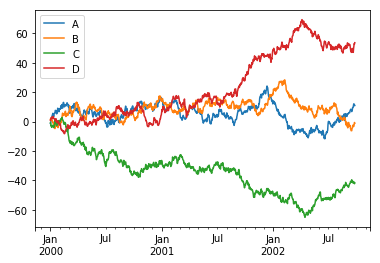

In [84]:
df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=ts.index, 
    columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')